In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv('Data/CSE_student_performances.csv')
data.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [3]:
data.shape

(99, 10)

In [4]:
data.dtypes

Age                                       int64
Gender                                   object
AcademicPerformance                      object
TakingNoteInClass                        object
DepressionStatus                         object
FaceChallangesToCompleteAcademicTask     object
LikePresentation                         object
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                            object
dtype: object

### Data Preprocessing and Visualization

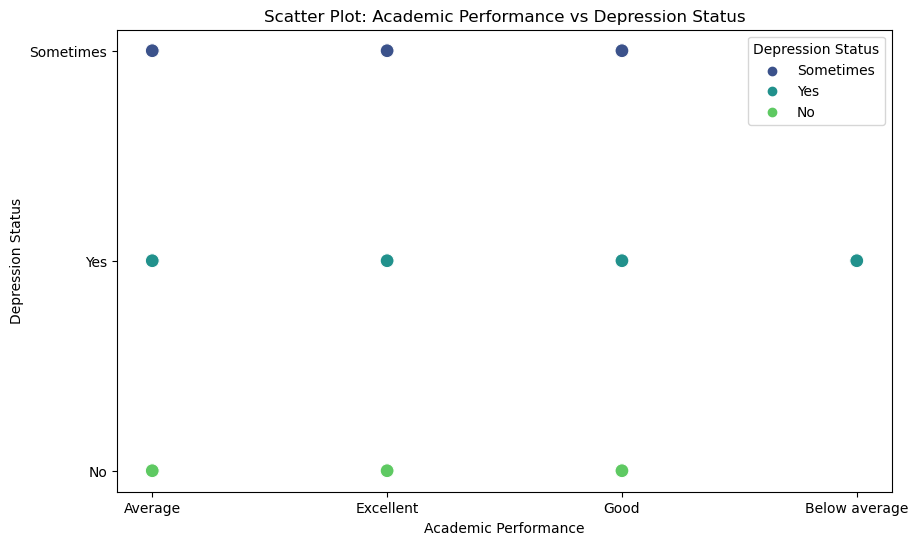

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns  


plt.figure(figsize=(10, 6))

sns.scatterplot(x='AcademicPerformance', y='DepressionStatus', data=data, hue='DepressionStatus', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Depression Status')
plt.xlabel('Academic Performance')
plt.ylabel('Depression Status')
plt.legend(title='Depression Status')

plt.show()

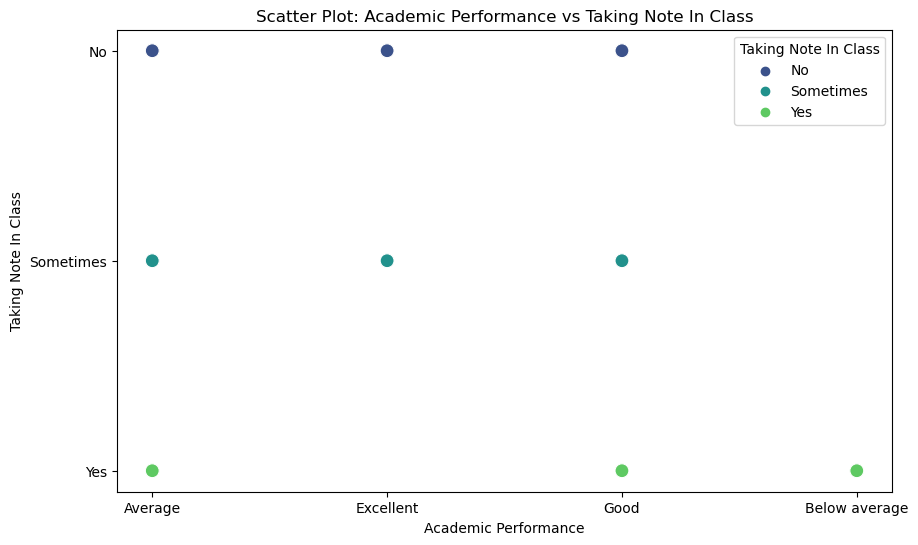

In [6]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='AcademicPerformance', y='TakingNoteInClass', data=data, hue='TakingNoteInClass', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Taking Note In Class')
plt.xlabel('Academic Performance')
plt.ylabel('Taking Note In Class')
plt.legend(title='Taking Note In Class')

plt.show()

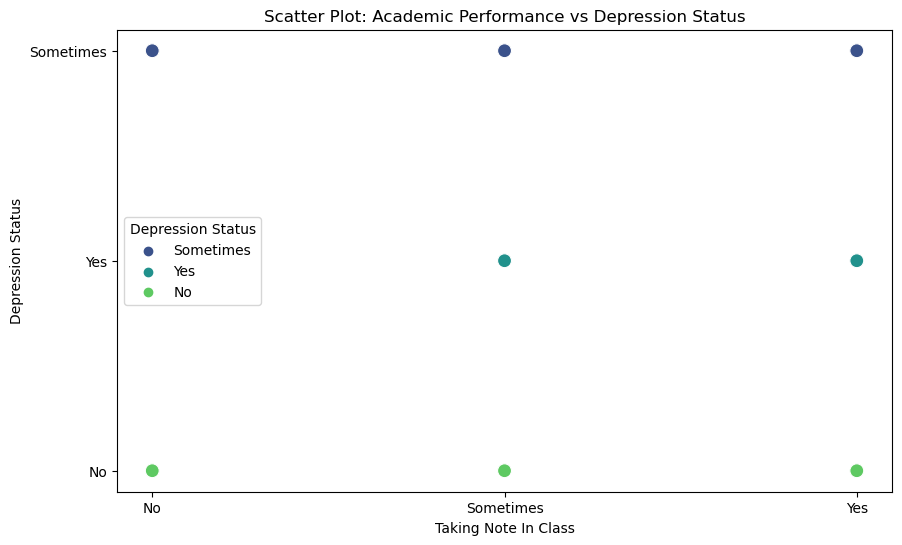

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  


plt.figure(figsize=(10, 6))

sns.scatterplot(x='TakingNoteInClass', y='DepressionStatus', data=data, hue='DepressionStatus', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Depression Status')
plt.xlabel('Taking Note In Class')
plt.ylabel('Depression Status')
plt.legend(title='Depression Status')

plt.show()

In [8]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [9]:
data['NumberOfFriend'] = data['NumberOfFriend'].fillna(method='ffill')

In [10]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          1
LikeNewThings                           0
dtype: int64

In [12]:
data = data.fillna(0)

In [13]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          0
LikeNewThings                           0
dtype: int64

In [14]:
data.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,0.0,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend', 'LikeNewThings']

data[columns_to_encode] = data[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

In [16]:
X = data.drop(['DepressionStatus'], axis=1)
y = data['DepressionStatus']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scale.fit(X_train)

X_train_transform = scale.transform(X_train)
X_test_transform = scale.transform(X_test)

#### Differents Model Use To Chcek Model Accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_transform, y_train)

y_pred = model.predict(X_test_transform)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.60

Confusion Matrix:
[[1 2 0]
 [0 5 1]
 [1 4 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.45      0.83      0.59         6
           2       0.86      0.55      0.67        11

    accuracy                           0.60        20
   macro avg       0.60      0.57      0.55        20
weighted avg       0.68      0.60      0.60        20



In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_transform, y_train)

y_pred = rf_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.85

Confusion Matrix:
[[3 0 0]
 [0 6 0]
 [0 3 8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.85        20
   macro avg       0.89      0.91      0.88        20
weighted avg       0.90      0.85      0.85        20



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_transform, y_train)

y_pred = knn_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

K-Nearest Neighbors:
Accuracy: 0.65

Confusion Matrix:
[[3 0 0]
 [2 3 1]
 [3 1 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.75      0.50      0.60         6
           2       0.88      0.64      0.74        11

    accuracy                           0.65        20
   macro avg       0.67      0.71      0.63        20
weighted avg       0.76      0.65      0.67        20



In [23]:
import lightgbm as lgb

lgb_classifier = lgb.LGBMClassifier(random_state=42)

lgb_classifier.fit(X_train_transform, y_train)

y_pred = lgb_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLightGBM:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 8
[LightGBM] [Info] Start training from score -1.479076
[LightGBM] [Info] Start training from score -0.731862
[LightGBM] [Info] Start training from score -1.233954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi